In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=2, floatmode='fixed', suppress=True)

In this notebook, we'll solve the system with gradient descent!

Check out [this blog post](https://towardsdatascience.com/linear-regression-using-gradient-descent-in-10-lines-of-code-642f995339c0)


## Disclaimer!
This is for educational purposes.  It *is* reasonable to solve this kind of thing with gradient
descent, but there are *lots* of tricks that make it "stable".  Don't use gradient descent you've
coded yourself in practice.

In [2]:
n1 = np.array([5,-4,8,-10,1,0]).reshape(-1,1)
n2 = np.array([7,-2,7,-9,0,-3]).reshape(-1,1)

X = np.concatenate( (np.ones( n1.shape ), n1), axis=1 )
y = n2

In [11]:
def linear_regression(Xmatrix, yvector, initialBeta=None, maxIterations=1000, stepSize=0.0001, convergenceThreshold=0.0001):
        # nobs is the number of observations
        # nparams is the number of parameters
    nobs, nparams = Xmatrix.shape 

    # X transpose times X
    XtX = Xmatrix.T @ Xmatrix

    if( initialBeta ):
        beta = initialBeta # Use the initializer if we have it
    else:
        beta = np.zeros((nparams,1)) # Initialize at zero 

    lasterror = np.linalg.norm( yvector - Xmatrix @ beta )
    error = lasterror
    
    for i in range(maxIterations):

        # the negative of the gradient tells us the direction 
        # in which to best change the parameters beta
        direction = Xmatrix.T @ yvector - XtX @ beta

        # update beta by taking a small step in the direction we chose
        beta = beta + ( stepSize * direction ) 

        error = np.linalg.norm( yvector - Xmatrix @ beta )
        if( error > lasterror ):
            print('yikes, the error went up!')
            return beta, error
        elif( lasterror - error < convergenceThreshold ):
            break; # the error isn't changing, we can stop early
     
        lasterror = error

    print( 'ran for %d iterations ' % (i+1) )
    
    return beta, error

In [4]:
# I 

beta, err = linear_regression( X, y )
print( beta )
print( err )

ran for 218 iterations 
[[0.00]
 [0.91]]
4.314734380967089


Text(-10, 9, 'n2 = 0.91 * n1 + 0.00')

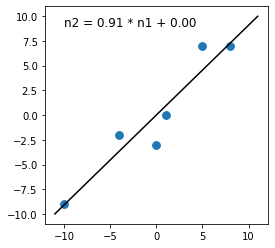

In [5]:

lr_xcoords = np.array([-11,11])
lr_ycoords = beta[1] * lr_xcoords + beta[0]

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.scatter(n1,n2,s=60)
ax.plot( lr_xcoords, lr_ycoords, color='k' )
ax.text( -10, 9, 'n2 = %2.2f * n1 + %2.2f'%(beta[1], beta[0]),fontsize=12)

In [19]:
# Now that we have it working, what answer do we get for our normal-equation breaking example?

Xnasty = np.array([[1,0],[1,0]])
ynasty = np.array([0,1]).reshape(-1,1)

betaNasty, err = linear_regression( Xnasty, ynasty, stepSize=0.01 )
print( betaNasty )

ran for 124 iterations 
[[0.46]
 [0.00]]
